 This is a simulation of a small to medium sized town with that has access to a mall and Costco via the highway

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from modsim import *

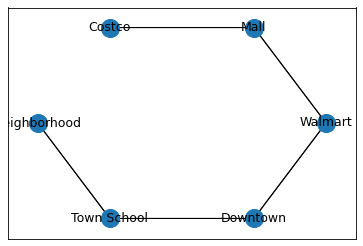

In [9]:
# This is a simulation of a small to medium sized town with that has access to a mall and Costco via the highway
graph = nx.DiGraph()

locs = ["Neighborhood", "Town School", "Downtown", "Walmart", "Mall", "Costco"]
#vals =


#Locations
for loc in locs:
  graph.add_node(loc)

#bus stops 2 ways
#two sets of probabilities since these are twin routes
graph.add_edge("Neighborhood", "Town School", label = 0.3)
graph.add_edge("Town School", "Downtown", label = 0.05)
graph.add_edge("Downtown", "Walmart", label = 0.25)
graph.add_edge("Walmart", "Mall", label = 0.2)
graph.add_edge("Mall", "Costco", label = 0.2)


graph.add_edge("Costco", "Mall", label = 0.1)
graph.add_edge("Mall", "Walmart", label = 0.1)
graph.add_edge("Walmart", "Downtown", label = 0.1)
graph.add_edge("Downtown", "Town School", label = 0.1)
graph.add_edge("Town School", "Neighborhood", label = 0.6)
#Everyone is going back to their house eventually so the node dropping you off at the neighborhood is very high probability.


graph_pos = nx.shell_layout(graph)
nx.draw_networkx_nodes(graph,graph_pos)
nx.draw_networkx_labels(graph,graph_pos)
nx.draw_networkx_edges(graph, graph_pos, node_size=10)

plt.show()



In [10]:
Locations = ["Neighborhood", "Town School", "Downtown", "Walmart", "Mall", "Costco"]
InitialValues = {} #create a dictionary of kwargs

#initialize the route to have 100 people start in the neighborhood


for num in range(len(Locations)):
    if Locations[num] == 'Neighborhood':
      InitialValues[Locations[num]] = 100
    else:
      InitialValues[Locations[num]] = 5


print(InitialValues)

busState = State(**InitialValues)


labels = nx.get_edge_attributes(graph,"label")

nodes = labels.keys()
for n in nodes:
    fromloc,toloc = n
    print(fromloc,toloc,labels[n])

def step(state,graph):

   #get the edges.
   #this returns a dictionary whose keys are pairs (from,to)
   #and whose values are the edge weights/labels
   edgesAndLabels = nx.get_edge_attributes(graph,"label")

    #you can print the dictionary to understand how it works
   for item in edgesAndLabels:  #step through all the edgesgraph.add_edge("Other buildings","Other Buildings",label=0.1)
        fromloc,toloc = item   #unpack the tuple
        weight = edgesAndLabels[item] #find the matching weight
        #print(fromloc,toloc,labels[item])
        #print(item)
        if (flip(weight)):
            #print('moving bus from ', fromloc, ' to ', toloc)

            if state[fromloc] > 0:
              state[fromloc] -= 1     # < ---- indexing as dictionary instead of dot notation
              state[toloc] += 1
   print(state)
   return

def run_simulation(state, graph, num_steps):
    """Simulate the given number of time steps.
    """
    results = TimeSeries()
    for i in range(num_steps):
        step(state, graph)
        results[i] = state['Neighborhood']




step(busState,graph)

run_simulation(busState,graph,12)
# 12 steps, 12 hours of operation (9am to 9pm)

busState


{'Neighborhood': 100, 'Town School': 5, 'Downtown': 5, 'Walmart': 5, 'Mall': 5, 'Costco': 5}
Neighborhood Town School 0.3
Town School Downtown 0.05
Town School Neighborhood 0.6
Downtown Walmart 0.25
Downtown Town School 0.1
Walmart Mall 0.2
Walmart Downtown 0.1
Mall Costco 0.2
Mall Walmart 0.1
Costco Mall 0.1
Neighborhood    100
Town School       5
Downtown          6
Walmart           4
Mall              5
Costco            5
Name: state, dtype: int64
Neighborhood    100
Town School       6
Downtown          5
Walmart           3
Mall              6
Costco            5
Name: state, dtype: int64
Neighborhood    101
Town School       5
Downtown          5
Walmart           3
Mall              6
Costco            5
Name: state, dtype: int64
Neighborhood    101
Town School       5
Downtown          4
Walmart           3
Mall              7
Costco            5
Name: state, dtype: int64
Neighborhood    102
Town School       4
Downtown          4
Walmart           4
Mall              7
Costc

Neighborhood    104
Town School       0
Downtown          5
Walmart           0
Mall             14
Costco            2
Name: state, dtype: int64